# Lý do chọn nhãn

Nghiên cứu cách hoạt động của 4 app Mood Tracker khác nhau trên App Store để tham khảo về cách chọn nhãn



1.   MoodTracker

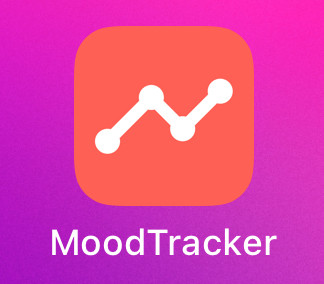

Về cơ bản, MoodTracker sẽ có 5 trạng thái cảm xúc cho người dùng lựa chọn
là "Awesome": Tuyệt vời, "Good": Tốt, "Normal": Bình thường, "Bad": Xấu và "Awful": Tồi tệ

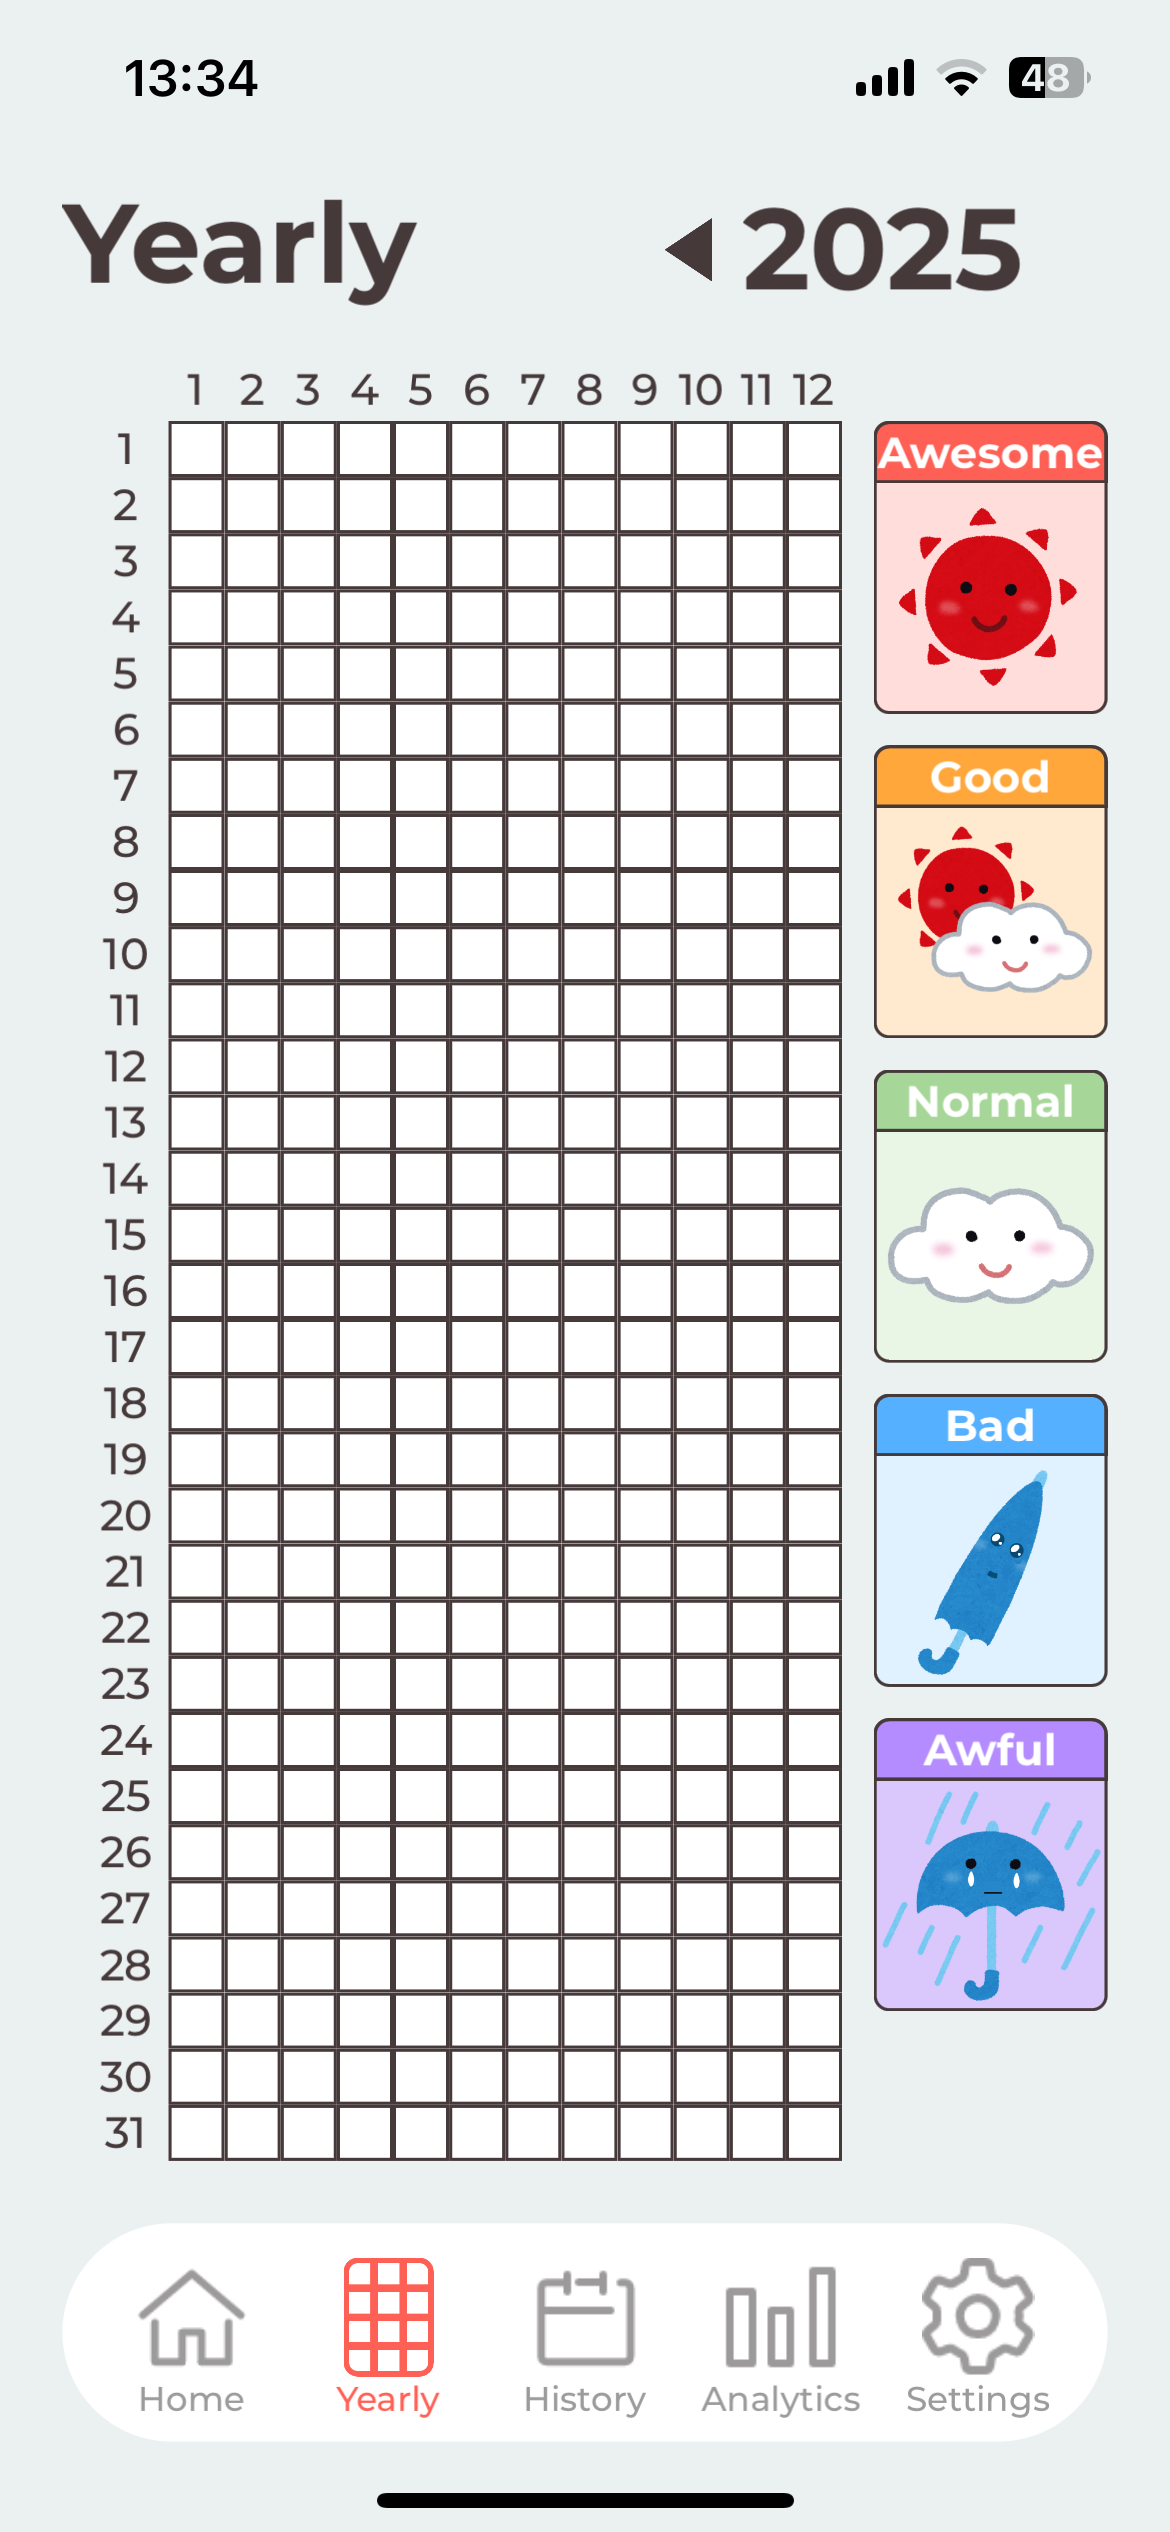

  2. Daylio

  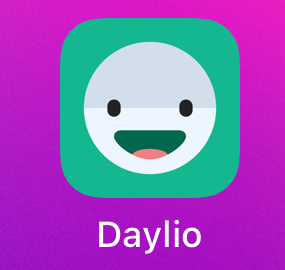

  Daylio tương tự như MoodTracker, cũng có 5 cảm xúc là "rad", "good", "normal", "bad", "awful". Đồng thời, với mỗi lần lựa chọn cảm xúc, người dùng sẽ được lựa chọn những hoạt động, những sự việc gắn với cảm xúc đó.

  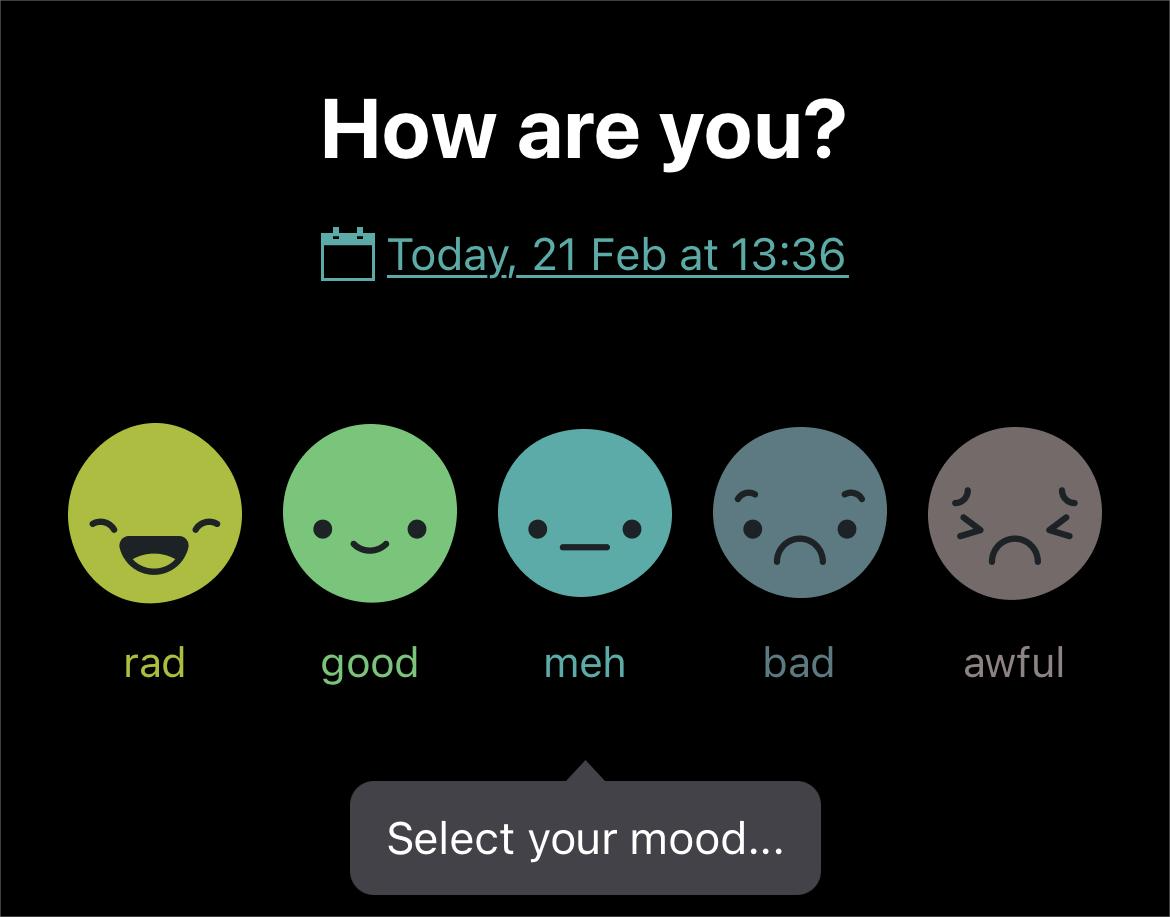

  3. DailyBean

  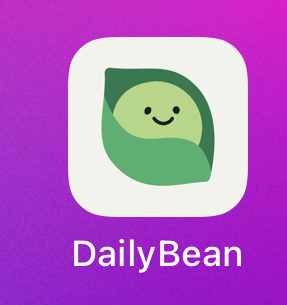

  DailyBean thì đa dạng và phức tạp hơn so với 2 app ở trên.
  Với câu hỏi "How was your day?", DailyBean cũng có 5 mốc cảm xúc như MoodTracker và Daylio, nhưng DailyBean có thêm lựa chọn cảm xúc đa dạng hơn như hào hứng, thư giãn, tự hào, buồn bã, giận dữ hay đang yêu

  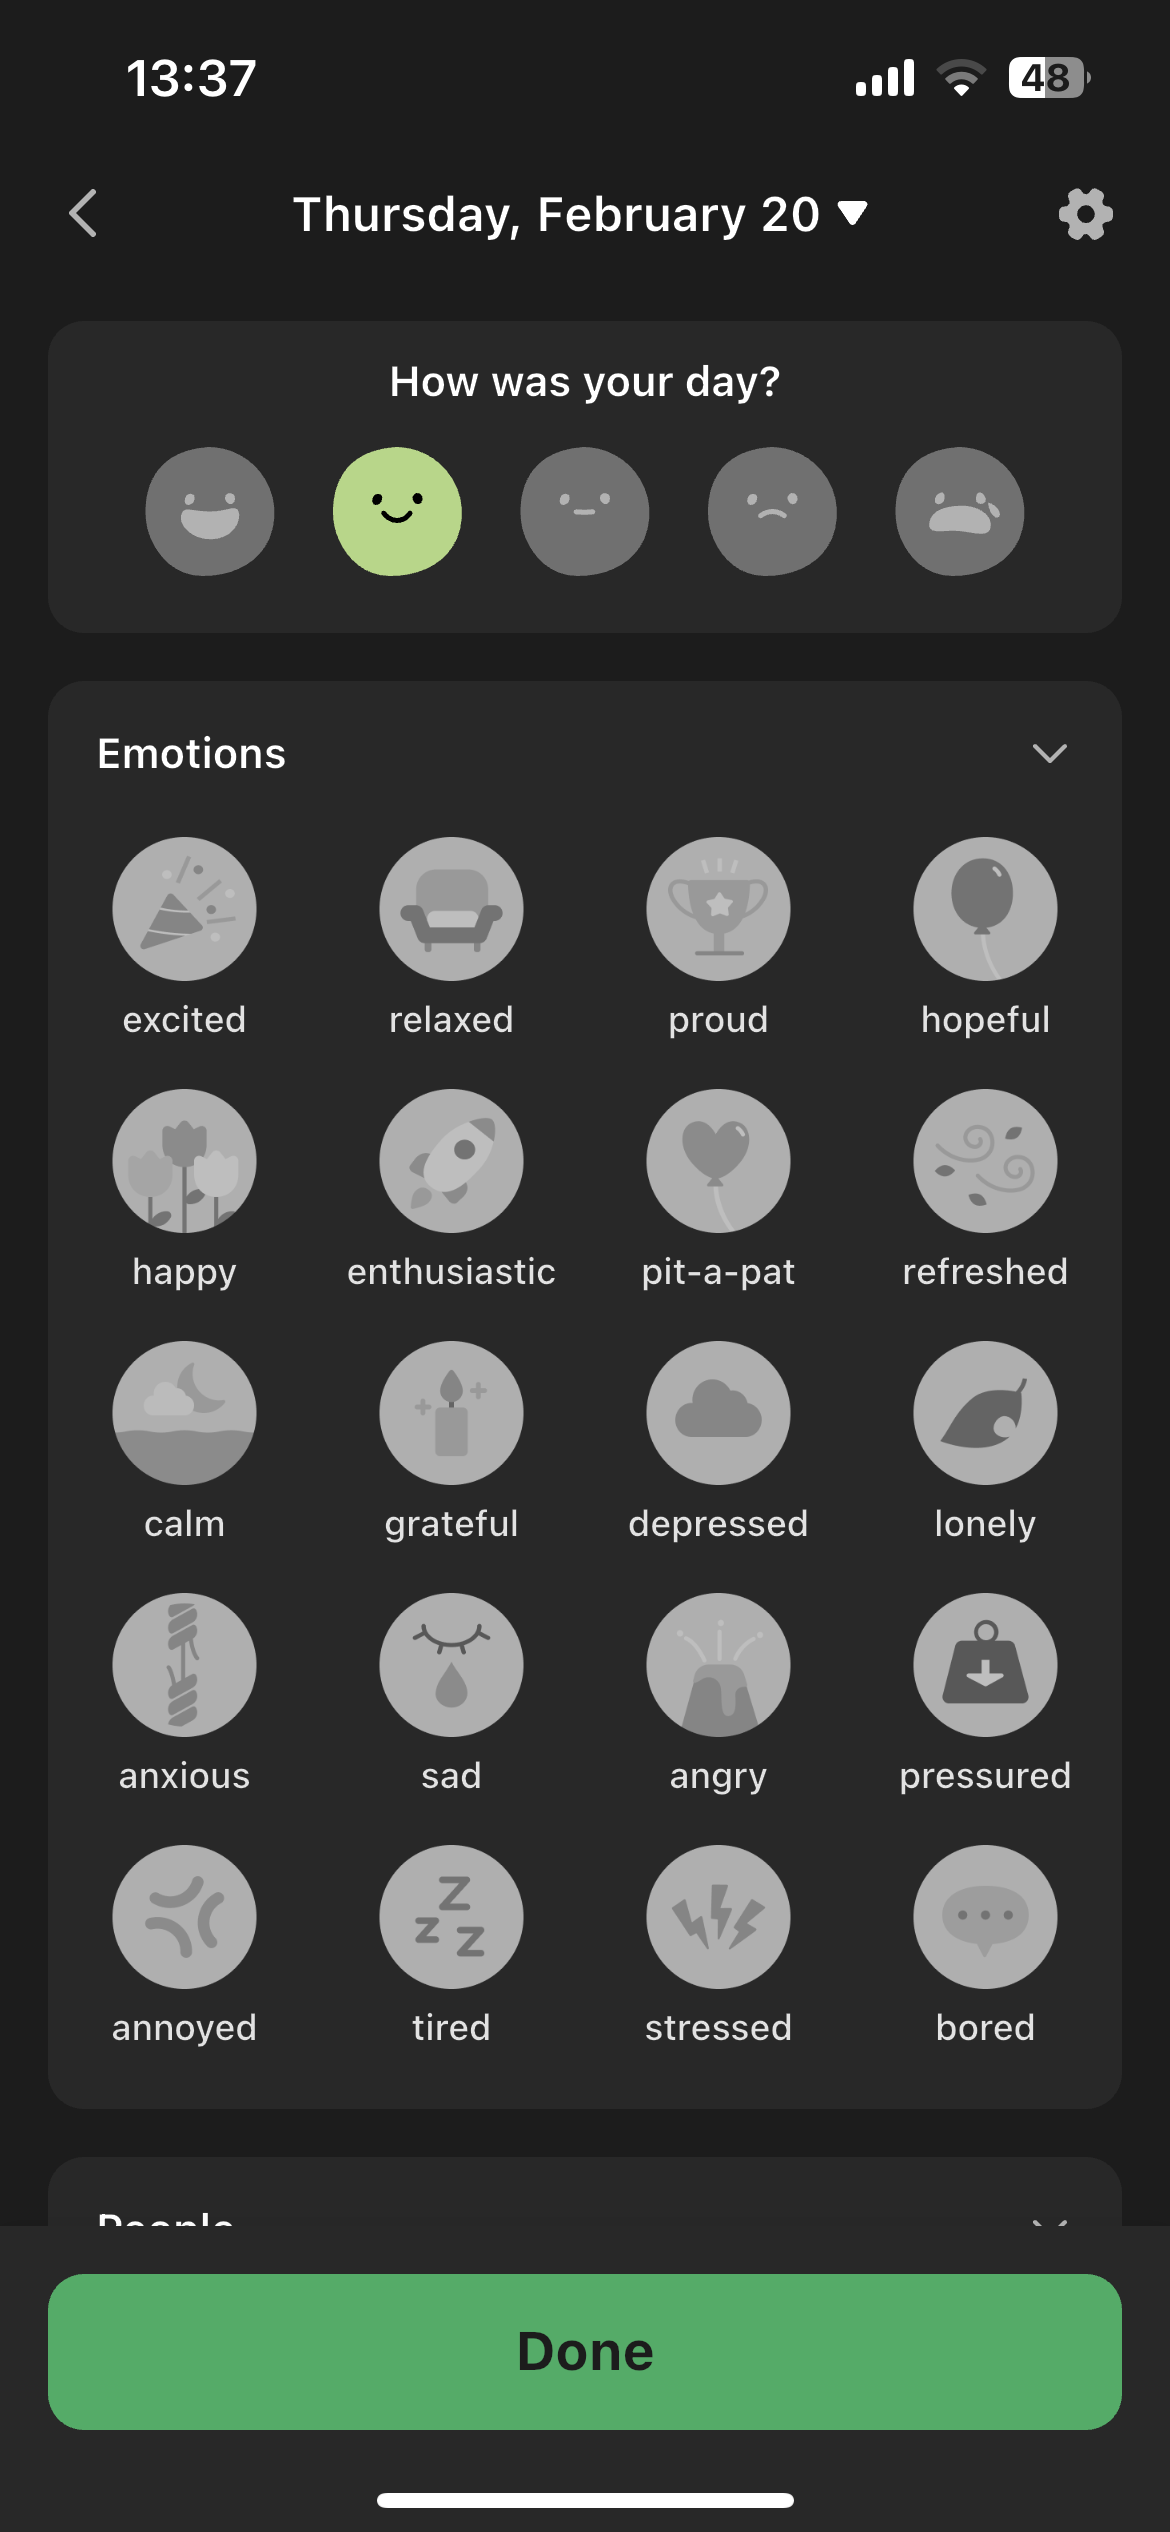

  4. Emolog

  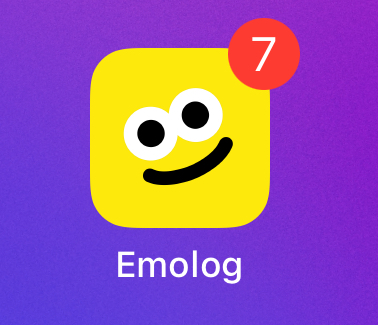

  Emolog quy về những cảm xúc như "Beloved", "'Happy, exciting", "Good, positive", "Calm, relaxed, focused", "Bad, negative", "Sad, gloomy", "Painful, shocking", "Anxiety, worry" và "Angry, frustrating".

**Các tiêu chí cho việc chọn nhãn**
- Cảm xúc tiêu biểu
- Dễ dàng để biểu đạt thông qua văn bản
- Có ranh giới rõ ràng giữa các nhãn, tránh trùng lặp

Tổng kết lại, cảm xúc con người rất da dạng và phức tạp nhưng ở đây chỉ lấy ra những cảm xúc tiêu biểu nhất để cải thiện độ chính xác và tốc độ của mô hình. Đồng thời, có những cảm xúc tuy khác nhau, nhưng cách diễn đạt thông qua văn bản có thể sẽ bị trùng lặp dẫn đến những sai lệch trong quá trình huấn luyện. Những cảm xúc được chọn sẽ là những cảm xúc tiêu biểu cũng như có ranh giới rõ ràng giữa chúng.
Từ 5 mốc cảm xúc đơn giản ban đầu, rút gọn lại còn 3 nhãn là "Happy", "Neutral" và "Sad". Ngoài ra, thêm vào đó những cảm xúc khác như "Inloved" - trạng thái đang yêu, "Angry" - Tức giận và "Worry" = Lo lắng

# Sử dụng LLM để sinh dữ liệu

Với mục tiêu sinh ra nhiều dữ liệu hơn, cũng như tạo ra văn phong gen Z hơn, chúng ta sẽ thử sử dụng đồng thời nhiều mô hình LLM khác nhau

In [1]:
pip install -q -U google-generativeai

In [2]:
# @title Thiết lập khóa API
from google.colab import userdata
import google.generativeai as genai

GEMINI_API_KEY=userdata.get('GEMINI_API_KEY')

genai.configure(api_key=GEMINI_API_KEY)

In [3]:
# @title Hàm lọc dữ liệu từ kết quả trả về của Gemini
import pandas as pd
import regex as re
def extract_narrative_expression(text):
    # Sử dụng regex để tìm các phần tử sau số thứ tự
    matches = re.findall(r'\d+\.\s(.+)', text)
    matches = [match.rstrip('.') for match in matches]
    return matches

In [48]:
# @title Tạo context prompt cùng các tham số
prompt = 'Sinh ra 200 lời tâm sự dạng nhật ký có thể có đại từ hoặc không, diễn tả trạng thái neutral, không cảm xúc, không quan tâm bằng tiếng việt, với văn phong khác nhau, về những chủ đề khác nhau trong cuộc sống' # @param {type: "string"}
system_instructions = 'Bạn sẽ trả lời như một gen Z chính hiệu' # @param {type: "string"}
model = 'gemini-2.0-flash' # @param {type: "string"} ["gemini-1.0-pro", "gemini-1.5-pro", "gemini-1.5-flash", "gemini-2.0-flash"]
temperature = 0.95 # @param {type: "slider", min: 0, max: 2, step: 0.05}

model = genai.GenerativeModel(model, system_instruction=system_instructions)
response = model.generate_content(contents=[prompt])

Vì muốn cho dữ liệu đa dạng và phong phú hơn, với một context prompt, tạo một biến system_instructions - giống như chỉ định cách nói, cách trả lời, nhân cách trả lời của mô hình mà ở đây là một gen Z. Đồng thời, sử dụng đan xen giữa các mô hình cũng như điều chỉnh temperature ngẫu nhiên để tạo ra dữ liệu đa dạng, cải thiện độ sáng tạo của mô hình

Đối với context prompt, thêm vào yêu cầu về văn phong và chủ đề khác nhau, được thay đổi để tạo nên sự da dạng về ngữ cảnh, độ dài cũng như chủ đề được đề cập đến

Sau khi tổng hợp, chúng ta có một file csv chứa khoảng 45000 dòng dữ liệu được gắn nhãn

In [107]:
df = pd.read_csv('data.csv')

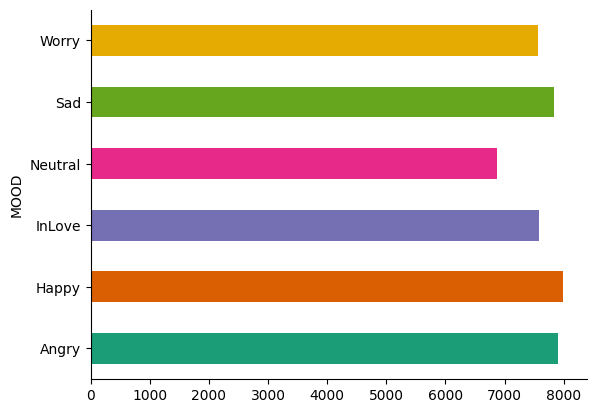

In [106]:
# @title MOOD

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('MOOD').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Dữ liệu giữa các nhãn được phân bố đồng đều, đa dạng phong phú và đảm bảo văn phong phù hợp với đối tượng gen Z
Số lượng nhãn 'Neutral' có hơi thấp hơn so với các nhãn còn lại những không quá đáng kể